# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [1]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\kmani\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
from newsapi import NewsApiClient
import string

In [3]:
# relevant nltk downloads
nltk.download('reuters')
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package reuters to
[nltk_data]     C:\Users\kmani\AppData\Roaming\nltk_data...
[nltk_data]   Package reuters is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\kmani\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kmani\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [4]:
# Read your api key environment variable
# YOUR CODE HERE!
load_dotenv()
api_key = os.getenv("news_api")

In [5]:
# Create a newsapi client
# YOUR CODE HERE!
newsapi = NewsApiClient(api_key=api_key)

In [6]:
# Fetch the Bitcoin news articles
# YOUR CODE HERE!
btc_headlines = newsapi.get_everything(
    q="Bitcoin", language="en", sort_by="relevancy"
)
print(f"Total number of Bitcoin articles: {btc_headlines['totalResults']}")

Total number of Bitcoin articles: 6437


In [7]:
# Fetch the Ethereum news articles
# YOUR CODE HERE!
eth_headlines = newsapi.get_everything(
    q="Ethereum", language="en", sort_by="relevancy"
)
print(f"Total number of Ethereum articles: {eth_headlines['totalResults']}")

Total number of Ethereum articles: 2789


In [8]:
# Create the Bitcoin sentiment scores DataFrame
# YOUR CODE HERE!
Btc_df = pd.DataFrame.from_dict(btc_headlines["articles"])
Btc_df.head()

,source,author,title,description,url,urlToImage,publishedAt,content
0,"{'id': None, 'name': 'Blogspot.com'}",noreply@blogger.com (Unknown),Elon Musk reveals who bitcoin's creator Satosh...,Musk.MARK RALSTON/AFP via Getty Images\r\nElon...,https://techncruncher.blogspot.com/2021/12/elo...,https://blogger.googleusercontent.com/img/a/AV...,2021-12-29T20:41:00Z,Musk.MARK RALSTON/AFP via Getty Images\r\nElon...
1,"{'id': 'bbc-news', 'name': 'BBC News'}",https://www.facebook.com/bbcnews,Indian PM Modi's Twitter hacked with bitcoin t...,The Indian prime minister's account had a mess...,https://www.bbc.co.uk/news/world-asia-india-59...,https://ichef.bbci.co.uk/news/1024/branded_new...,2021-12-12T10:59:57Z,"Image source, AFP via Getty Images\r\nImage ca..."
2,"{'id': None, 'name': 'New York Times'}",Corey Kilgannon,Why New York State Is Experiencing a Bitcoin Boom,Cryptocurrency miners are flocking to New York...,https://www.nytimes.com/2021/12/05/nyregion/bi...,https://static01.nyt.com/images/2021/11/25/nyr...,2021-12-06T00:42:28Z,The plant opening northeast of Niagara Falls t...
3,"{'id': 'reuters', 'name': 'Reuters'}",None,"U.S. SEC rejects Valkyrie, Kryptoin bitcoin tr...",The U.S. Securities and Exchange Commission ve...,https://www.reuters.com/markets/funds/us-sec-r...,https://www.reuters.com/resizer/VcQMWevXkM8HjQ...,2021-12-23T20:25:00Z,Dec 23 (Reuters) - The U.S. Securities and Exc...
4,"{'id': 'engadget', 'name': 'Engadget'}",Jon Fingas,Someone 'briefly compromised' the Indian Prime...,People aren't done hijacking major politicians...,https://www.engadget.com/india-prime-minister-...,https://s.yimg.com/os/creatr-uploaded-images/2...,2021-12-12T20:59:39Z,People aren't done hijacking major politicians...


In [9]:
btc_headlines["articles"][15]['description']

'In a disclosure that should surprise no one, the head honcho at the CIA has confirmed that the intelligence agency has multiple projects related to cryptocurrency.Read more...'

In [10]:
btc_sentiments = []

for article in btc_headlines["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        positive_sentiment = sentiment["pos"]
        negative_sentiment = sentiment["neg"]
        neutral_sentiment = sentiment["neu"]
        
        btc_sentiments.append({
            "Date": date,
            "Text": text,
            "Compound": compound,
            "Positive": positive_sentiment,
            "Negative": negative_sentiment,
            "Neutral": neutral_sentiment
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
btc_sentiments_df = pd.DataFrame(btc_sentiments)
btc_sentiments_df.head()

,Date,Text,Compound,Positive,Negative,Neutral
0,2021-12-29,Musk.MARK RALSTON/AFP via Getty Images\r\nElon...,0.3612,0.077,0.000,0.923
1,2021-12-12,"Image source, AFP via Getty Images\r\nImage ca...",-0.4019,0.000,0.078,0.922
2,2021-12-06,The plant opening northeast of Niagara Falls t...,0.0000,0.000,0.000,1.000
3,2021-12-23,Dec 23 (Reuters) - The U.S. Securities and Exc...,0.5859,0.142,0.000,0.858
4,2021-12-12,People aren't done hijacking major politicians...,0.5267,0.112,0.000,0.888


In [11]:
# Create the Ethereum sentiment scores DataFrame
# YOUR CODE HERE!
eth_sentiments = []

for article in eth_headlines["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        positive_sentiment = sentiment["pos"]
        negative_sentiment = sentiment["neg"]
        neutral_sentiment = sentiment["neu"]
        
        eth_sentiments.append({
            "Date": date,
            "Text": text,
            "Compound": compound,
            "Positive": positive_sentiment,
            "Negative": negative_sentiment,
            "Neutral": neutral_sentiment
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
eth_sentiments_df = pd.DataFrame(eth_sentiments)
eth_sentiments_df.head()

,Date,Text,Compound,Positive,Negative,Neutral
0,2021-12-10,White Castle double cheeseburger.Erin McDowell...,0.0000,0.000,0.000,1.000
1,2021-12-30,"Crypto Street Restaurant, Clearwater Beach, Fl...",-0.1531,0.000,0.060,0.940
2,2021-12-10,"Nicholas Merten , an expert in cryptography, p...",0.4939,0.119,0.000,0.881
3,2021-12-08,While people around the world still searched f...,0.3612,0.070,0.000,0.930
4,2021-12-06,The wait is finally over. After a year-long de...,0.4019,0.155,0.115,0.729


In [12]:
# Describe the Bitcoin Sentiment
# YOUR CODE HERE!
btc_sentiments_df.describe()

,Compound,Positive,Negative,Neutral
count,20.000000,20.000000,20.000000,20.000000
mean,0.063185,0.049300,0.033750,0.916950
std,0.363483,0.064745,0.058288,0.082255
min,-0.796400,0.000000,0.000000,0.767000
25%,-0.010450,0.000000,0.000000,0.854000
50%,0.000000,0.000000,0.000000,0.922500
75%,0.385600,0.116250,0.065000,1.000000
max,0.585900,0.158000,0.233000,1.000000


In [13]:
# Describe the Ethereum Sentiment
# YOUR CODE HERE!
eth_sentiments_df.describe()

,Compound,Positive,Negative,Neutral
count,20.000000,20.000000,20.000000,20.000000
mean,0.121635,0.048600,0.021950,0.929400
std,0.324656,0.069803,0.040455,0.083886
min,-0.584900,0.000000,0.000000,0.729000
25%,0.000000,0.000000,0.000000,0.888500
50%,0.000000,0.000000,0.000000,0.941000
75%,0.371375,0.086250,0.015000,1.000000
max,0.762000,0.225000,0.115000,1.000000


### Questions:

Q: Which coin had the highest mean positive score?

A: Bitcoin (BTC)

Q: Which coin had the highest compound score?

A: Ethereum (ETH)

Q. Which coin had the highest positive score?

A: Ethereum (ETH)

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [14]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [15]:
# Instantiate the lemmatizer
# YOUR CODE HERE!
lemmatizer = WordNetLemmatizer()

# Create a list of stopwords
# YOUR CODE HERE!
stop_words = set(stopwords.words('english'))

# Expand the default stopwords list if necessary
# YOUR CODE HERE!
stop_words_addon = {'url','com', 'www'}
# stop_words.add('url')
# stop_words.add('com')
# stop_words.add('www')
stop_words = stop_words.union(stop_words_addon)

In [16]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    
    # Remove the punctuation from text
    regex = re.compile("[^a-zA-Z ]")
    regex_Punct_clean = regex.sub('', text)
   
    # Create a tokenized list of the words
    words = word_tokenize(regex_Punct_clean)
    
    # Lemmatize words into root words
    lem = [lemmatizer.lemmatize(word) for word in words]
    
    # Convert the words to lowercase and # Remove the stop words
    tokens = [word.lower() for word in lem if word.lower() not in stop_words]
    tokens = [word.lower() for word in lem]
    
    return tokens

In [17]:
# Create a new tokens column for Bitcoin
# YOUR CODE HERE!
btc_sentiments_df['Tokens'] = btc_sentiments_df['Text'].apply(tokenizer)
btc_sentiments_df

,Date,Text,Compound,Positive,Negative,Neutral,Tokens
0,2021-12-29,Musk.MARK RALSTON/AFP via Getty Images\r\nElon...,0.3612,0.077,0.000,0.923,"[muskmark, ralstonafp, via, getty, imageselon,..."
1,2021-12-12,"Image source, AFP via Getty Images\r\nImage ca...",-0.4019,0.000,0.078,0.922,"[image, source, afp, via, getty, imagesimage, ..."
2,2021-12-06,The plant opening northeast of Niagara Falls t...,0.0000,0.000,0.000,1.000,"[the, plant, opening, northeast, of, niagara, ..."
3,2021-12-23,Dec 23 (Reuters) - The U.S. Securities and Exc...,0.5859,0.142,0.000,0.858,"[dec, reuters, the, us, securities, and, excha..."
4,2021-12-12,People aren't done hijacking major politicians...,0.5267,0.112,0.000,0.888,"[people, arent, done, hijacking, major, politi..."
5,2021-12-12,Representation of cryptocurrency bitcoin is se...,0.0000,0.000,0.000,1.000,"[representation, of, cryptocurrency, bitcoin, ..."
6,2021-12-06,(Reuters) - A computer scientist who has claim...,0.0000,0.000,0.000,1.000,"[reuters, a, computer, scientist, who, ha, cla..."
7,2021-12-28,A representation of the virtual cryptocurrency...,0.0000,0.000,0.000,1.000,"[a, representation, of, the, virtual, cryptocu..."
8,2021-12-04,"Dec 4 (Reuters) - Bitcoin dropped 8.4% to $49,...",-0.3818,0.000,0.080,0.920,"[dec, reuters, bitcoin, dropped, to, at, gmt, ..."
9,2021-12-04,Posted \r\nBitcoin shed a fifth of its value o...,0.5106,0.158,0.000,0.842,"[posted, bitcoin, shed, a, fifth, of, it, valu..."


In [18]:
# Create a new tokens column for Ethereum
# YOUR CODE HERE!
eth_sentiments_df['Tokens'] = eth_sentiments_df['Text'].apply(tokenizer)
eth_sentiments_df

,Date,Text,Compound,Positive,Negative,Neutral,Tokens
0,2021-12-10,White Castle double cheeseburger.Erin McDowell...,0.0000,0.000,0.000,1.000,"[white, castle, double, cheeseburgererin, mcdo..."
1,2021-12-30,"Crypto Street Restaurant, Clearwater Beach, Fl...",-0.1531,0.000,0.060,0.940,"[crypto, street, restaurant, clearwater, beach..."
2,2021-12-10,"Nicholas Merten , an expert in cryptography, p...",0.4939,0.119,0.000,0.881,"[nicholas, merten, an, expert, in, cryptograph..."
3,2021-12-08,While people around the world still searched f...,0.3612,0.070,0.000,0.930,"[while, people, around, the, world, still, sea..."
4,2021-12-06,The wait is finally over. After a year-long de...,0.4019,0.155,0.115,0.729,"[the, wait, is, finally, over, after, a, yearl..."
5,2021-12-06,MicroStrategy CEO Michael SaylorJoe Raedle/Get...,0.2732,0.111,0.075,0.814,"[microstrategy, ceo, michael, saylorjoe, raedl..."
6,2021-12-29,CryptoPunksRokas Tenys\r\n<ul><li>NFT sales ha...,0.0000,0.000,0.000,1.000,"[cryptopunksrokas, tenysullinft, sale, have, h..."
7,2021-12-07,The U.S. Captioning Company and the British In...,0.2247,0.058,0.000,0.942,"[the, us, captioning, company, and, the, briti..."
8,2021-12-06,Amid the news of Bitcoin's price plunge on Sat...,-0.5849,0.000,0.109,0.891,"[amid, the, news, of, bitcoins, price, plungeo..."
9,2021-12-06,I own some cryptocurrencya decision which bega...,0.4497,0.078,0.000,0.922,"[i, own, some, cryptocurrencya, decision, whic..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [19]:
from collections import Counter
from nltk import ngrams

In [20]:
def bigram_counter(articles): 
    # Combine all articles in corpus (input) into one large string
    large_string = ' '.join(articles)
    # use tokenizer function on big_string
    large_string_tokens = tokenizer(large_string)
    # get ngrams where n=2
    bigrams = ngrams(large_string_tokens, n=2)
    counter = dict(Counter(bigrams))
    # return as a pandas dataframe with two columns
    return pd.DataFrame(list(counter.items()), columns=['Bigram', 'Count'])

In [21]:
# Generate the Bitcoin N-grams where N=2
# YOUR CODE HERE!
btc_corpus = [btc_sentiments_df.Text.str.cat()]
bigram_counter(btc_corpus)

,Bigram,Count
0,"(muskmark, ralstonafp)",1
1,"(ralstonafp, via)",1
2,"(via, getty)",2
3,"(getty, imageselon)",1
4,"(imageselon, musk)",1
...,...,...
412,"(responsible, for)",1
413,"(for, them)",1
414,"(them, in)",1
415,"(in, any)",1


In [22]:
# Generate the Ethereum N-grams where N=2
# YOUR CODE HERE!
eth_corpus = [eth_sentiments_df.Text.str.cat()]
bigram_counter(eth_corpus)

,Bigram,Count
0,"(white, castle)",2
1,"(castle, double)",1
2,"(double, cheeseburgererin)",1
3,"(cheeseburgererin, mcdowellinsiderthe)",1
4,"(mcdowellinsiderthe, list)",1
...,...,...
502,"(some, final)",1
503,"(final, state)",1
504,"(state, when)",1
505,"(when, transa)",1


In [23]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=3):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [24]:
# Use token_count to get the top 10 words for Bitcoin
# YOUR CODE HERE!
btc_articles = btc_sentiments_df.Text.str.cat()
btc_top_ten_words = token_count(tokenizer(btc_articles), 10)
btc_top_ten_words

[('a', 34),
 ('of', 27),
 ('the', 24),
 ('bitcoin', 15),
 ('to', 14),
 ('in', 12),
 ('on', 10),
 ('ha', 8),
 ('this', 7),
 ('cryptocurrency', 6)]

In [25]:
# Use token_count to get the top 10 words for Ethereum
# YOUR CODE HERE!
eth_articles = eth_sentiments_df.Text.str.cat()
eth_top_ten_words = token_count(tokenizer(eth_articles), 10)
eth_top_ten_words

[('the', 20),
 ('a', 16),
 ('in', 12),
 ('of', 11),
 ('bitcoin', 11),
 ('to', 10),
 ('on', 9),
 ('is', 9),
 ('and', 8),
 ('with', 7)]

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [26]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

Text(0.5, 0.98, 'Bitcoin Word Cloud')

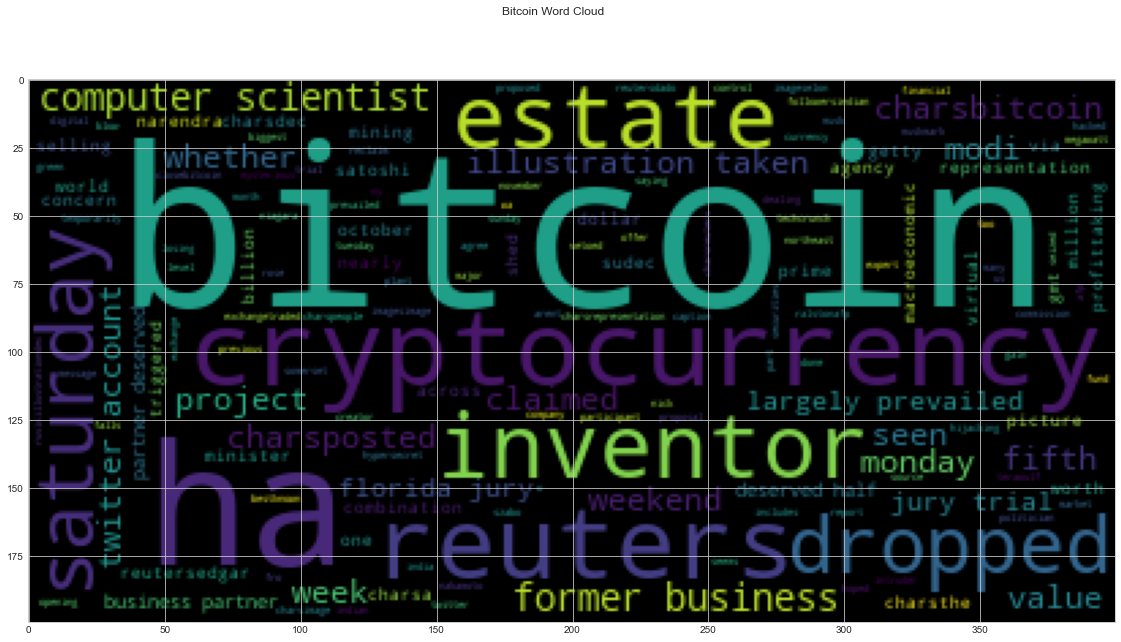

In [27]:
# Generate the Bitcoin word cloud
# YOUR CODE HERE!
# tokenize bitcoin_article using tokenizer function
btc_tokens = tokenizer(btc_articles)
# join bitcoin tokens as a big string
big_string_btc = ' '.join(btc_tokens)

# Generate the bitcoin word cloud and plot
wc_btc = WordCloud().generate(big_string_btc)
plt.imshow(wc_btc)
plt.suptitle('Bitcoin Word Cloud')

Text(0.5, 0.98, 'Ethereum Word Cloud')

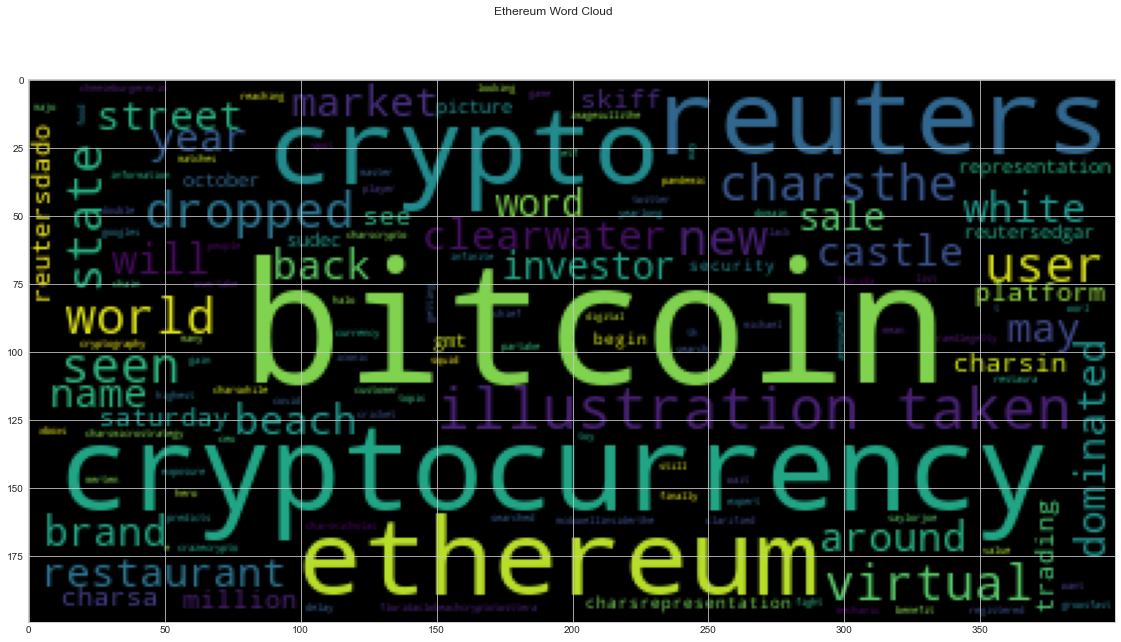

In [28]:
# Generate the Ethereum word cloud
# YOUR CODE HERE!
# tokenize Ethereum_article using tokenizer function
eth_tokens = tokenizer(eth_articles)
# join ethereum tokens as a big string
big_string_eth = ' '.join(eth_tokens)

# Generate the ethereum word cloud and plot
wc_eth = WordCloud().generate(big_string_eth)
plt.imshow(wc_eth)
plt.suptitle('Ethereum Word Cloud')

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [29]:
import spacy
from spacy import displacy

In [30]:
# Download the language model for SpaCy
# !python -m spacy download en_core_web_sm

In [31]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [32]:
# Concatenate all of the Bitcoin text together
# YOUR CODE HERE!
btc_text_string = ' '.join(tokenizer(btc_articles))

In [33]:
# Run the NER processor on all of the text
# YOUR CODE HERE!
btc_conc_doc = nlp(btc_text_string)

# Add a title to the document
# YOUR CODE HERE!
btc_conc_doc.user_data['title']='Bitcoin NER'

In [34]:
# Render the visualization
# YOUR CODE HERE!
displacy.render(btc_conc_doc, style='ent')

In [35]:
# List all Entities
# YOUR CODE HERE!
entities_btc = [ent.text for ent in btc_conc_doc.ents]
entities_btc

['nick szabo',
 'more than million',
 'narendra',
 'india',
 'this month',
 'million',
 'terawulf',
 'megawatt charsdec',
 'two',
 'indian',
 'narendra',
 'november',
 'reuters',
 'sunday',
 'monday',
 'florida',
 'half o charsa representation',
 'october',
 'reuters',
 'tuesday',
 'charsdec reuters',
 'saturday',
 'fifth',
 'saturday',
 'nearly a billion dollar',
 'fifth',
 'saturday',
 'nearly a billion dollar',
 'october',
 'reuters',
 'monday',
 'the start of the week',
 'a bruising weekend',
 'one',
 'this week',
 'florida',
 'half',
 'this week',
 'florida',
 'half',
 'cia',
 'david gerard',
 'revealedgettya',
 'monday',
 'this weekend',
 'the weekend',
 'an hour']

---

### Ethereum NER

In [36]:
# Concatenate all of the Ethereum text together
# YOUR CODE HERE!
eth_text_string = ' '.join(tokenizer(eth_articles))

In [37]:
# Run the NER processor on all of the text
# YOUR CODE HERE!
eth_conc_doc = nlp(eth_text_string)

# Add a title to the document
# YOUR CODE HERE!
eth_conc_doc.user_data['title']='Ethereum NER'

In [38]:
# Render the visualization
# YOUR CODE HERE!
displacy.render(eth_conc_doc, style='ent')

In [39]:
# List all Entities
# YOUR CODE HERE!
entities_eth = [ent.text for ent in eth_conc_doc.ents]
entities_eth

['white castle',
 'florida',
 'crazecrypto street',
 'year',
 'michael saylorjoe',
 'a breakthrough year',
 'the british institute of verbatim',
 'saturday',
 'the weekend',
 'june',
 'october',
 'reuters',
 'charsdec reuters',
 'saturday',
 'november',
 'reuters',
 'sunday',
 'october',
 'reuters',
 'tuesday',
 'cnbc',
 'wednesday']

---